In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Advertisements.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [3]:
# Splitting the dataset into the Training set and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [15]:
# Feature Scaling | standardization | Z score | MEan + STD (will be geting from fit())
#_________________________________________________________
# why ? To bring all the variables on the same scale
# - Its a best PRactise in Place [ mandatory for KNN and KMEANs]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# max_depth/ verbose = Ayush - For prunning | 

# max_features= Aditya | AUTO 

# max_leaf_nodes= Kajal | Max number of leaf Nodes | 

# min_samples_leaf= Gurpreet | Min number of rows required to be a leaf node*

# min_samples_split=  Lakshya | Min number of rows required to split a node further*


# n_estimators= Surya

# n_job = -1 
#____________________________________________________________
# oob_score= Ankit | is a way to validate the RF M | Out of BAG*  
  
                     # N3 of correctly predicted rows 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
# I can also think of applying the GRIDSEARCH for RANDOM FOREST
# so as to find the optimal values of some arguments to fine tune to performance of
# Random FOrest


pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120, 150, 200],
                  'max_features': [5, 6, 7, 8, 9, 10]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_results = gscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002717F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002717F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(604, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(604, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (604, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=604, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 14, 18, 27, 41, 268942, tzinfo=tzutc()), 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'session': '7bfe349c994045a7825f6fc98a7ab055', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'7bfe349c994045a7825f6fc98a7ab055']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 14, 18, 27, 41, 268942, tzinfo=tzutc()), 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'session': '7bfe349c994045a7825f6fc98a7ab055', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'7bfe349c994045a7825f6fc98a7ab055'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 14, 18, 27, 41, 268942, tzinfo=tzutc()), 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'session': '7bfe349c994045a7825f6fc98a7ab055', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e979ce23e68c48e288ad2edf131e5241', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-19-e2caadb3111d>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 89ca5c0, execution_co...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000000A502B70, file "<ipython-input-19-e2caadb3111d>", line 15>
        result = <ExecutionResult object at 89ca5c0, execution_co...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000000A502B70, file "<ipython-input-19-e2caadb3111d>", line 15>, result=<ExecutionResult object at 89ca5c0, execution_co...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000000A502B70, file "<ipython-input-19-e2caadb3111d>", line 15>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# Importing the libraries\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd', "# Importing the dataset\ndataset = pd.read_csv('A...c[:, [2, 3]].values\ny = dataset.iloc[:, 4].values", '# Splitting the dataset into the Training set an...t_split(X, y, test_size = 0.25, random_state = 0)', '# Feature Scaling | standardization | Z score | ..._transform(X_train)\nX_test = sc.transform(X_test)', '# Building the Decision tree with max depht as 4...TreeClassifier()\nclassifier.fit(X_train, y_train)', '# Building the Decision tree with max depht as 4...onTreeClassifier\nclassifier.fit(X_train, y_train)', '# Building the Decision tree with max depht as 4...TreeClassifier()\nclassifier.fit(X_train, y_train)', 'from sklearn.model_selection import GridSearchCV', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(train_X, train_y)', '# Fitting Random Forest Classification to the Tr...                # N3 of correctly predicted rows ', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(train_X, train_y)', '# Importing the libraries\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd', "# Importing the dataset\ndataset = pd.read_csv('A...c[:, [2, 3]].values\ny = dataset.iloc[:, 4].values", '# Splitting the dataset into the Training set an...t_split(X, y, test_size = 0.25, random_state = 0)', '# Feature Scaling | standardization | Z score | ..._transform(X_train)\nX_test = sc.transform(X_test)', 'from sklearn.model_selection import GridSearchCV', '# Fitting Random Forest Classification to the Tr...                # N3 of correctly predicted rows ', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)'], 'Out': {10: RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), 17: RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False)}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X': array([[    19,  19000],
       [    35,  20000]...,  33000],
       [    49,  36000]], dtype=int64), 'X_test': array([[-0.80480212,  0.50496393],
       [-0.01... 0.59194336],
       [ 0.38358493,  0.99784738]]), 'X_train': array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), '_': RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), '_10': RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# Importing the libraries\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd', "# Importing the dataset\ndataset = pd.read_csv('A...c[:, [2, 3]].values\ny = dataset.iloc[:, 4].values", '# Splitting the dataset into the Training set an...t_split(X, y, test_size = 0.25, random_state = 0)', '# Feature Scaling | standardization | Z score | ..._transform(X_train)\nX_test = sc.transform(X_test)', '# Building the Decision tree with max depht as 4...TreeClassifier()\nclassifier.fit(X_train, y_train)', '# Building the Decision tree with max depht as 4...onTreeClassifier\nclassifier.fit(X_train, y_train)', '# Building the Decision tree with max depht as 4...TreeClassifier()\nclassifier.fit(X_train, y_train)', 'from sklearn.model_selection import GridSearchCV', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(train_X, train_y)', '# Fitting Random Forest Classification to the Tr...                # N3 of correctly predicted rows ', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(train_X, train_y)', '# Importing the libraries\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd', "# Importing the dataset\ndataset = pd.read_csv('A...c[:, [2, 3]].values\ny = dataset.iloc[:, 4].values", '# Splitting the dataset into the Training set an...t_split(X, y, test_size = 0.25, random_state = 0)', '# Feature Scaling | standardization | Z score | ..._transform(X_train)\nX_test = sc.transform(X_test)', 'from sklearn.model_selection import GridSearchCV', '# Fitting Random Forest Classification to the Tr...                # N3 of correctly predicted rows ', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)', '# I can also think of applying the GRIDSEARCH fo...-1)\n\ngscv_results = gscv_rf.fit(X_train, y_train)'], 'Out': {10: RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), 17: RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False)}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X': array([[    19,  19000],
       [    35,  20000]...,  33000],
       [    49,  36000]], dtype=int64), 'X_test': array([[-0.80480212,  0.50496393],
       [-0.01... 0.59194336],
       [ 0.38358493,  0.99784738]]), 'X_train': array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), '_': RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), '_10': RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\aagarwal\Desktop\trainingPy\60- Python\SDS_ML_UD\3 - Classification\RF\Random_Forest_Classification\<ipython-input-19-e2caadb3111d> in <module>()
     10                         param_grid = pargrid_rf, 
     11                         cv = 5,
     12                         verbose = True, 
     13                         n_jobs = -1)
     14 
---> 15 gscv_results = gscv_rf.fit(X_train, y_train)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e..._score='warn',
       scoring=None, verbose=True), X=array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), y=array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]])
        y = array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Mar 14 23:57:59 2020
PID: 11156                Python 3.6.5: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), {'score': <function _passthrough_scorer>}, array([ 52,  54,  56,  59,  63,  66,  67,  68,  ..., 292, 293, 294,
       295, 296, 297, 298, 299]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       51, 53, 55, 57, 58, 60, 61, 62, 64, 65]), True, {'max_features': 5, 'n_estimators': 70}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), {'score': <function _passthrough_scorer>}, array([ 52,  54,  56,  59,  63,  66,  67,  68,  ..., 292, 293, 294,
       295, 296, 297, 298, 299]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       51, 53, 55, 57, 58, 60, 61, 62, 64, 65]), True, {'max_features': 5, 'n_estimators': 70})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[ 0.58164944, -0.88670699],
       [-0.60...-0.45180983],
       [-1.20093113,  1.40375139]]), y=array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), scorer={'score': <function _passthrough_scorer>}, train=array([ 52,  54,  56,  59,  63,  66,  67,  68,  ..., 292, 293, 294,
       295, 296, 297, 298, 299]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...,
       51, 53, 55, 57, 58, 60, 61, 62, 64, 65]), verbose=True, parameters={'max_features': 5, 'n_estimators': 70}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...e=None, verbose=0,
            warm_start=False)>
        X_train = array([[-0.11157634,  0.24402563],
       [ 2.16...-0.45180983],
       [-1.20093113,  1.40375139]])
        y_train = array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,...1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), y=array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 69
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object BaseForest.fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object BaseForest.fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=2131580280, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), None, 0, 70), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=2131580280, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), None, 0, 70)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=2131580280, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), y=array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), sample_weight=None, tree_idx=0, n_trees=70, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...False, random_state=2131580280, splitter='best')>
        X = array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32)
        y = array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]])
        sample_weight = None
        curr_sample_weight = array([0., 2., 2., 3., 0., 0., 3., 3., 1., 2., 0..., 0., 1., 0., 1., 1., 0., 0., 2., 3.,
       0.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=2131580280, splitter='best'), X=array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), y=array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), sample_weight=array([0., 2., 2., 3., 0., 0., 3., 3., 1., 2., 0..., 0., 1., 0., 1., 1., 0., 0., 2., 3.,
       0.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=2131580280, splitter='best'), X=array([[-0.11157634,  0.24402563],
       [ 2.16...      [-1.2009311 ,  1.4037514 ]], dtype=float32), y=array([[1.],
       [1.],
       [1.],
       [1...    [0.],
       [0.],
       [0.],
       [0.]]), sample_weight=array([0., 2., 2., 3., 0., 0., 3., 3., 1., 2., 0..., 0., 1., 0., 1., 1., 0., 0., 2., 3.,
       0.]), check_input=False, X_idx_sorted=None)
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [ ]:
gscv_results.

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Find the Accuracy and AUC ROC of the confusion matrix and compare that with Training result

array([[64,  4],
       [ 3, 29]], dtype=int64)

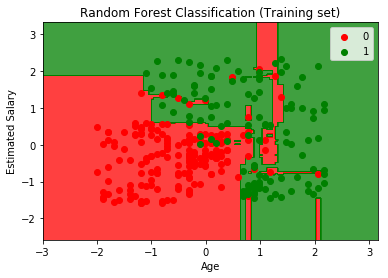

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

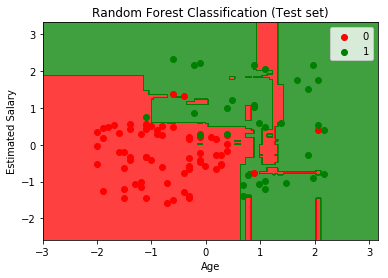

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()